CoinMarketCap API Website

In [1]:
import pandas as pd
import requests
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from time import sleep
import os


In [2]:
def fetch_crypto_data():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',  # ← Adding API Key from Coinmarketcap
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        df = pd.json_normalize(data['data'])
        df['timestamp'] = pd.to_datetime('now')
        return df
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Error occurred: {e}")
        return pd.DataFrame()  # This will return empty DataFrame on failure


In [3]:
# Initialize the main DataFrame
master_df = pd.DataFrame()

# Number of loops (e.g., 5 means 5 minutes of data collection)
loop_count = 5

# Loop to fetch and append data every minute
for i in range(loop_count):
    print(f"Fetching data: Loop {i+1} of {loop_count}")
    
    new_data = fetch_crypto_data()
    
    if not new_data.empty:
        master_df = pd.concat([master_df, new_data], ignore_index=True)
        
        # Save to CSV (optional)
        csv_file = 'crypto_data_log.csv'
        file_exists = os.path.isfile(csv_file)
        new_data.to_csv(csv_file, mode='a', header=not file_exists, index=False)
    
    sleep(60)  # This will wait 60 seconds before next call

print("✅ Data collection complete.")


Fetching data: Loop 1 of 5
Fetching data: Loop 2 of 5
Fetching data: Loop 3 of 5
Fetching data: Loop 4 of 5
Fetching data: Loop 5 of 5
✅ Data collection complete.


In [18]:
df_log = pd.read_csv('crypto_data_log.csv')
df_log.head()

#Reading the CSV

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12267,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.989811e+07,1.989811e+07,...,60.3093,2.483007e+12,NaN,2025-07-27T10:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-27 16:18:41.119617
1,1027,Ethereum,ETH,ethereum,10413,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207109e+08,1.207109e+08,...,11.8113,4.607707e+11,NaN,2025-07-27T10:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-27 16:18:41.119617
2,52,XRP,XRP,xrp,1661,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.923965e+10,9.998590e+10,...,4.8502,3.193994e+11,NaN,2025-07-27T10:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-27 16:18:41.119617
3,825,Tether USDt,USDT,tether,138635,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.635732e+11,1.668110e+11,...,4.1944,1.668672e+11,NaN,2025-07-27T10:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-27 16:18:41.119617
4,1839,BNB,BNB,bnb,2638,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.392886e+08,1.392886e+08,...,2.8472,1.110719e+11,NaN,2025-07-27T10:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-27 16:18:41.119617


In [21]:
# Thus will Show all rows (None means unlimited)
pd.set_option('display.max_rows', None)

# This will Show all columns
pd.set_option('display.max_columns', None)

TRANSFORMING DATA

In [29]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [32]:
#This will show all Crypto Data from CSV
master_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12267,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19898106.00000,19898106.00000,False,NaN,1,NaN,NaN,None,2025-07-27T10:51:00.000Z,118295.58830,45626869531.25370,-32.20690,0.32366,0.20747,0.28025,10.51770,8.62293,24.33914,2353858155368.53711,60.33850,2484207354345.14990,None,2025-07-27T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-27 16:22:10.719720
1,1027,Ethereum,ETH,ethereum,10413,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120710937.91130,120710937.91130,True,NaN,2,NaN,NaN,None,2025-07-27T10:50:00.000Z,3833.72139,24252270059.45929,-18.93750,1.88052,1.83423,3.45436,56.46034,45.14641,110.77334,462772104619.03827,11.86260,462772104619.03998,None,2025-07-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-27 16:22:10.719720
2,52,XRP,XRP,xrp,1661,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59239646627.00000,99985901574.00000,False,NaN,3,NaN,NaN,None,2025-07-27T10:50:00.000Z,3.19725,3899383722.59355,-38.21970,0.82798,-0.30812,-9.03762,52.71818,38.84255,37.00066,189404179985.93497,4.85520,319725371048.40002,None,2025-07-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-27 16:22:10.719720
3,825,Tether USDt,USDT,tether,138635,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,163573215329.81125,166810996208.56595,True,NaN,4,NaN,NaN,None,2025-07-27T10:50:00.000Z,1.00048,78517247917.31461,-26.69500,0.00666,0.01339,0.01954,0.00792,0.07381,0.00620,163652003642.63586,4.19500,166891344063.35001,None,2025-07-27T10:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-27 16:22:10.719720
4,1839,BNB,BNB,bnb,2638,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139288610.30000,139288610.30000,False,NaN,5,NaN,NaN,None,2025-07-27T10:50:00.000Z,797.41412,1898802996.99884,-6.32690,0.25907,1.66613,6.66297,23.61980,16.21419,31.44143,111070703969.02824,2.84720,111070703969.03000,None,2025-07-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-27 16:22:10.719720
5,5426,Solana,SOL,solana,957,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,538430567.70322,606184280.02915,True,NaN,6,525236893.30000,98718304145.64964,None,2025-07-27T10:50:00.000Z,187.95006,3481776382.33537,-39.92600,0.72071,-0.40380,4.38508,32.29051,7.94326,22.90284,101198056004.57237,2.59410,113932370112.56000,None,2025-07-27T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-27 16:22:10.719720
6,3408,USDC,USDC,usd-coin,29861,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,64304240792.84217,64304240792.84217,False,NaN,7,60901219650.23000,60891411172.13278,None,2025-07-27T10:50:00.000Z,0.99984,8560317935.95188,-22.40080,-0.01420,-0.01833,0.00998,-0.01968,0.03163,-0.02989,64293884239.37743,1.64810,64293884239.38000,None,2025-07-27T10:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-27 16:22:10.719720
7,74,Dogecoin,DOGE,dogecoin,1262,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150267906383.70523,150267906383.70523,True,NaN,8,NaN,NaN,None,2025-07-27T10:50:00.000Z,0.23815,1554059822.52208,-33.12960,1.42520,-0.44560,-5.28127,47.82889,6.88091,31.07109,35785729052.55920,0.

In [36]:
#Grouping by Name and Sorting Data as per Percent Change and getting the Avg
df = master_df.groupby("name", sort=False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.33194,0.21461,0.31317,10.50027,8.65199,24.40689
Ethereum,1.86269,1.74350,3.48156,56.38718,45.07166,110.98593
XRP,0.90075,-0.14338,-8.91122,52.89157,38.93672,37.26825
Tether USDt,0.00203,0.00675,0.00433,0.00584,0.02394,-0.00502
BNB,0.33072,1.73229,6.74082,23.69988,16.21949,31.52544
Solana,0.85438,-0.27720,4.50783,32.37949,7.99670,23.06054
USDC,-0.00645,-0.01124,0.00422,-0.00886,0.00955,-0.02383
Dogecoin,1.51146,-0.15281,-5.08523,48.12007,7.01640,31.34110
TRON,-0.32680,1.51932,0.59945,18.52961,16.66371,30.18711


In [55]:
#Renaming the columns to make it easier to read and understand
transformed_df = master_df[[
    'name',
    'symbol',
    'cmc_rank',
    'quote.USD.price',
    'quote.USD.volume_24h',
    'quote.USD.market_cap',
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d',
    'timestamp'
]].copy()

# Renaming the columns to be easier to read
transformed_df.columns = [
    'Name',
    'Symbol',
    'Rank',
    'Price (USD)',
    'Volume (24h)',
    'Market Cap (USD)',
    'Change 1h (%)',
    'Change 24h (%)',
    'Change 7d (%)',
    'Change 30d (%)',
    'Change 60d (%)',
    'Change 90d (%)',
    'Timestamp'
]


In [138]:
#Displaying Top 10 rows
transformed_df.head(11)

,Name,Symbol,Rank,Price (USD),Volume (24h),Market Cap (USD),Change 1h (%),Change 24h (%),Change 7d (%),Change 30d (%),Change 60d (%),Change 90d (%),Timestamp
0,Bitcoin,BTC,1,118295.58830,45626869531.25370,2353858155368.53711,0.32366,0.20747,0.28025,10.51770,8.62293,24.33914,2025-07-27 16:22:10.719720
1,Ethereum,ETH,2,3833.72139,24252270059.45929,462772104619.03827,1.88052,1.83423,3.45436,56.46034,45.14641,110.77334,2025-07-27 16:22:10.719720
2,XRP,XRP,3,3.19725,3899383722.59355,189404179985.93497,0.82798,-0.30812,-9.03762,52.71818,38.84255,37.00066,2025-07-27 16:22:10.719720
3,Tether USDt,USDT,4,1.00048,78517247917.31461,163652003642.63586,0.00666,0.01339,0.01954,0.00792,0.07381,0.00620,2025-07-27 16:22:10.719720
4,BNB,BNB,5,797.41412,1898802996.99884,111070703969.02824,0.25907,1.66613,6.66297,23.61980,16.21419,31.44143,2025-07-27 16:22:10.719720
5,Solana,SOL,6,187.95006,3481776382.33537,101198056004.57237,0.72071,-0.40380,4.38508,32.29051,7.94326,22.90284,2025-07-27 16:22:10.719720
6,USDC,USDC,7,0.99984,8560317935.95188,64293884239.37743,-0.01420,-0.01833,0.00998,-0.01968,0.03163,-0.02989,2025-07-27 16:22:10.719720
7,Dogecoin,DOGE,8,0.23815,1554059822.52208,35785729052.55920,1.42520,-0.44560,-5.28127,47.82889,6.88091,31.07109,2025-07-27 16:22:10.719720
8,TRON,TRX,9,0.32149,595223860.77477,30454495266.05482,-0.36387,1.51560,0.60134,18.55333,16.67998,30.16968,2025-07-27 16:22:10.719720
9,Cardano,ADA,10,0.82815,901916140.29369,29323384801.73504,1.50852,0.09551,-2.69273,49.41046,9.33329,14.65925,2025-07-27 16:22:10.719720


Visulaization

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Top 10 Unique Coins by Market Cap'}, ylabel='Name'>

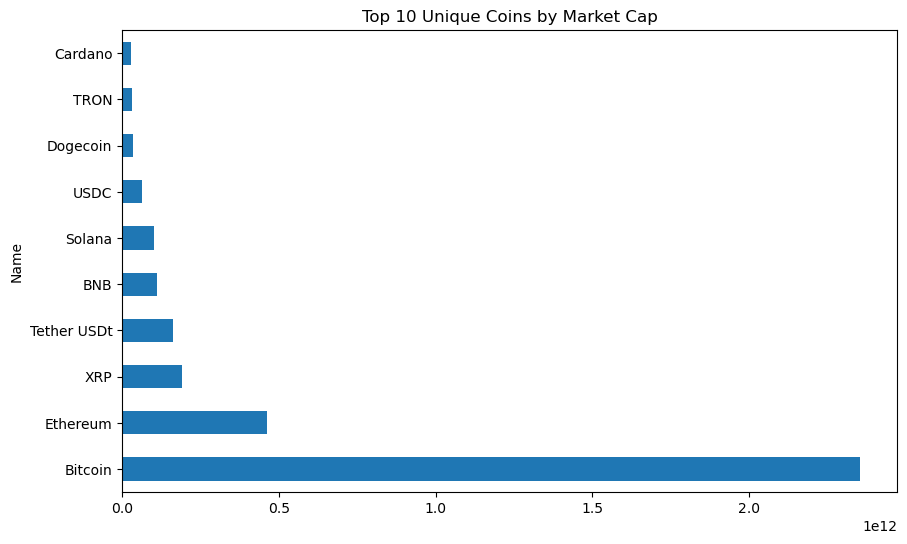

In [135]:
# This will Keep only the latest entry for each coin
latest_data = transformed_df.sort_values('Timestamp').drop_duplicates(subset='Symbol', keep='last')

# Getting the top 10 unique coins by market cap
top10_unique = latest_data.sort_values(by='Market Cap (USD)', ascending=False).head(10)

# Plotting it
top10_unique[['Name', 'Symbol', 'Market Cap (USD)']].plot(
    kind='barh',
    x='Name',
    y='Market Cap (USD)',
    title='Top 10 Unique Coins by Market Cap',
    figsize=(10,6),
    legend=False
)


In [136]:
top10 = transformed_df.head(10)

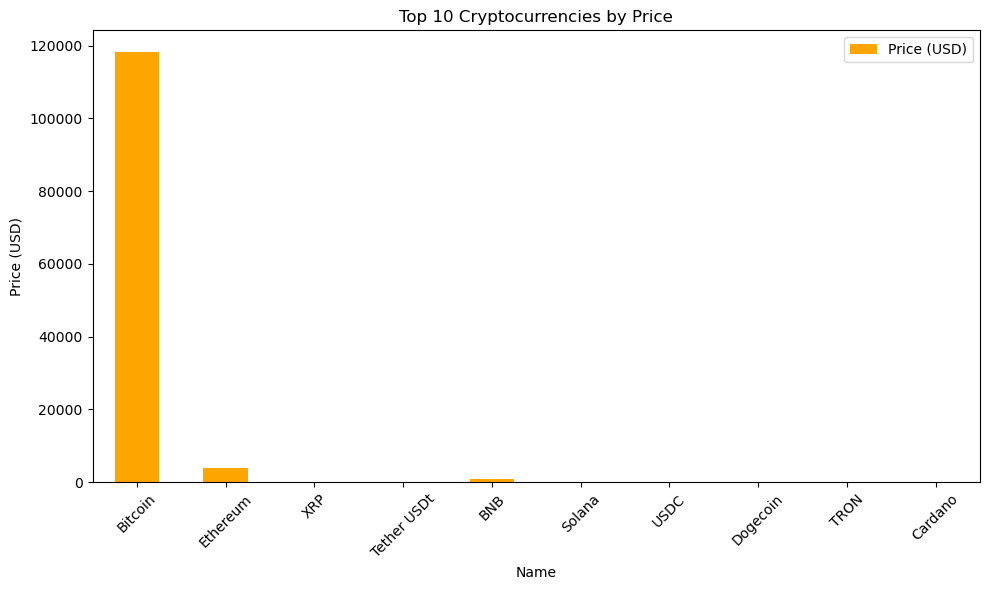

In [137]:
#Bar Graph for Top 10 Cryptocurrencies by Price
top10.plot(
    kind='bar',
    x='Name',
    y='Price (USD)',
    figsize=(10, 6),
    color='orange',
    title='Top 10 Cryptocurrencies by Price'
)
#Plotting and labelling
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


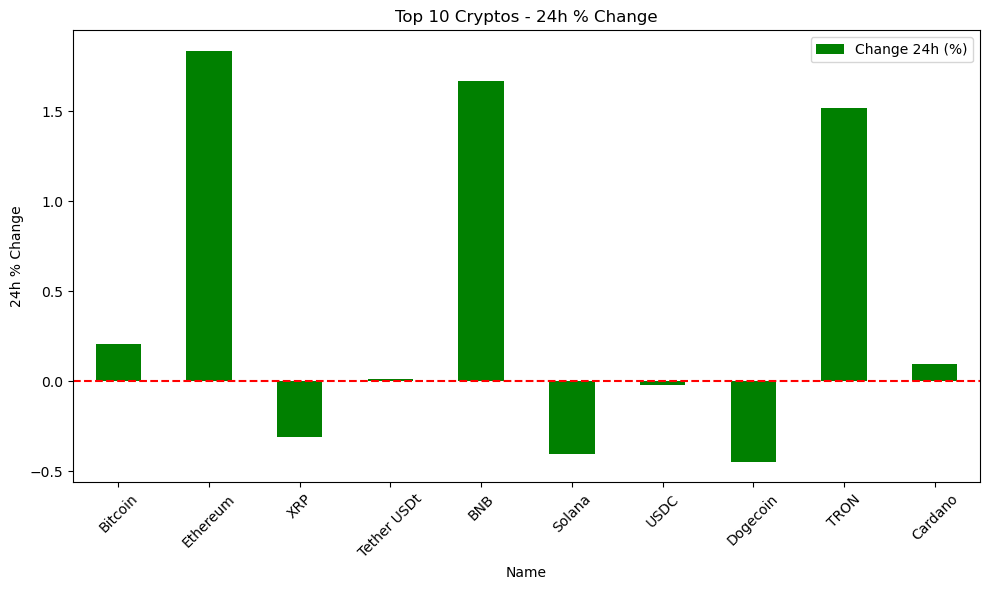

In [75]:
transformed_df.head(10).plot(
    kind='bar',
    x='Name',
    y='Change 24h (%)',
    figsize=(10, 6),
    color='green',
    title='Top 10 Cryptos - 24h % Change'
)
plt.ylabel('24h % Change')
plt.axhline(0, color='red', linestyle='--')  # between reference line at 0%
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


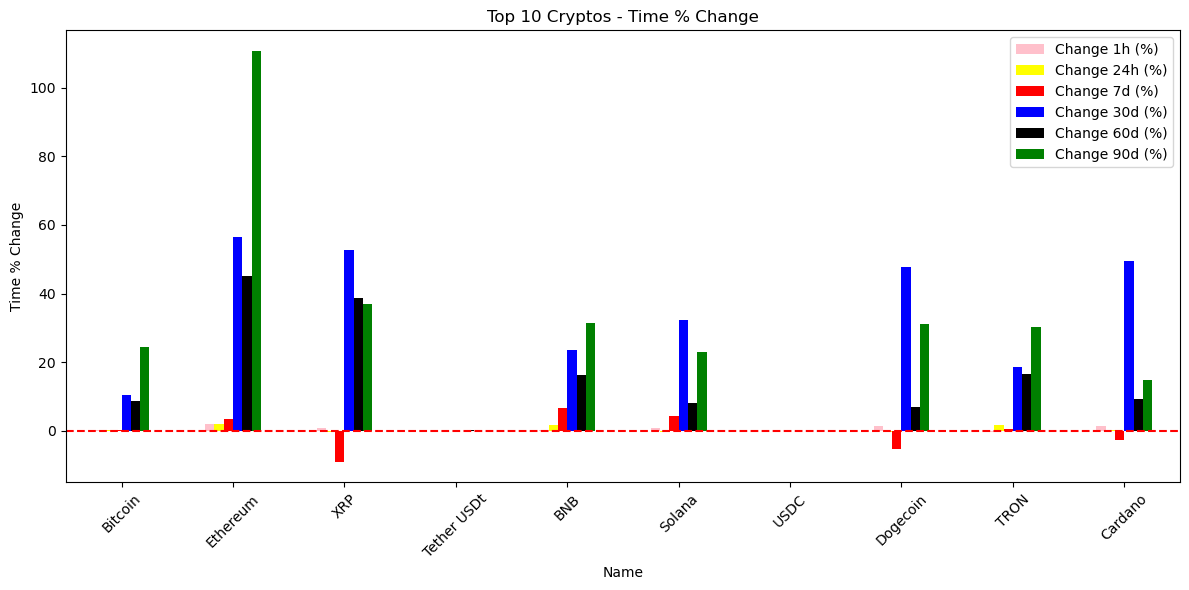

In [100]:
transformed_df.head(10).plot(
    kind='bar',
    x='Name',
    y=['Change 1h (%)','Change 24h (%)', 'Change 7d (%)', 'Change 30d (%)', 'Change 60d (%)', 'Change 90d (%)'],
    figsize=(12, 6),
    color=['pink','yellow','red','blue','black','green'],
    title='Top 10 Cryptos - Time % Change'
)
plt.ylabel('Time % Change')
plt.axhline(0, color='red', linestyle='--')  # between reference line at 0%
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


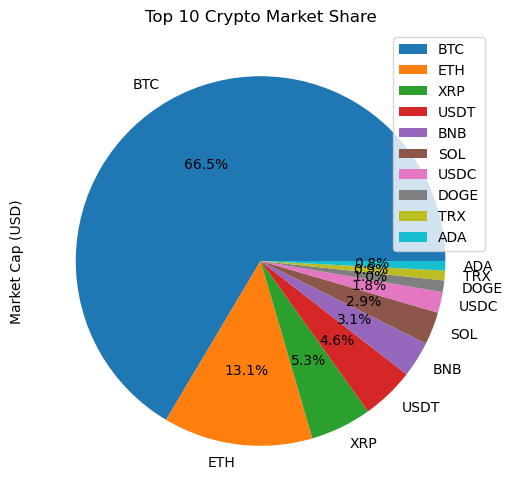

In [85]:
# Pie chart of top 10 coins by market cap
transformed_df.head(10).plot.pie(
    y='Market Cap (USD)',
    labels=transformed_df.head(10)['Symbol'],
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Top 10 Crypto Market Share'
)

plt.show()


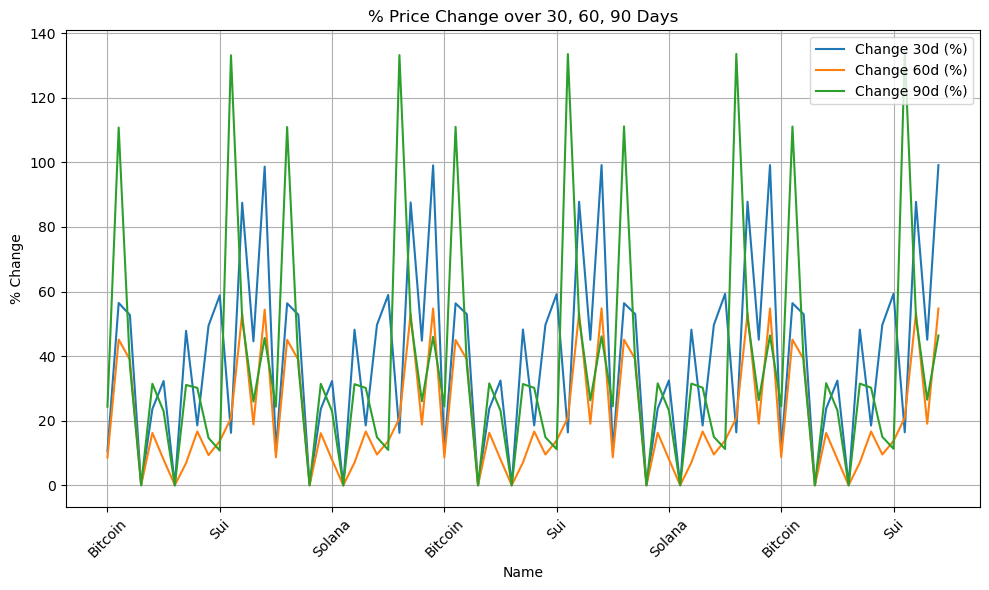

In [132]:
# Pick only required columns
line_df = transformed_df[['Name', 'Change 30d (%)', 'Change 60d (%)', 'Change 90d (%)']].set_index('Name')

# Plot line graph
line_df.plot(
    kind='line',
    figsize=(10, 6),
    title='% Price Change over 30, 60, 90 Days'
)

plt.ylabel('% Change')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
